In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.collections import LineCollection
import glob
import cv2
from scipy.optimize import curve_fit
from scipy.optimize import leastsq
import pathlist
import fft_func
import functions
import data_formatting
import  analysis_function

In [11]:
#基礎情報
LED_1=[1.0,1.0]
LED_2=[2.0,1.0]
LED_3=[1.0,2.0]
LED_4=[2.0,2.0]
LED_T=np.array([LED_1,LED_2,LED_3,LED_4])
recv_1=[1.25,1.0]
recv_2=[1.25,1.5]
recv_3=[1.25,2.0]
recv_4=[1.75,1.0]
recv_5=[1.75,1.5]
recv_6=[1.75,2.0]
recv_T=np.array([recv_1,recv_2,recv_3,recv_4,recv_5,recv_6])
recv_1_ana=[1.25,1.25]
recv_2_ana=[1.25,1.75]
recv_3_ana=[1.75,1.25]
recv_4_ana=[1.75,1.75]
recv_ana=np.array([recv_1_ana,recv_2_ana,recv_3_ana,recv_4_ana])
LED_freq_deg = np.array([1, 4, 7, 11])
# LED_freq_deg = np.array([120, 120, 120, 120])

imgs_all: (24, 1920, 1080), imgs_each: (24, 1620, 1080)
avg_rows_all: (24, 1080), avg_rows_each: (24, 1080)


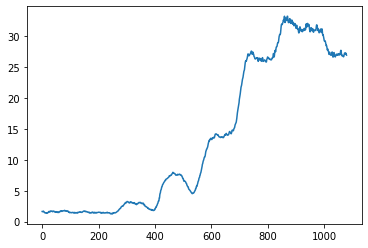

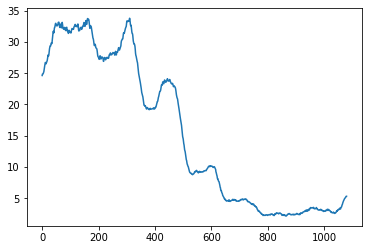

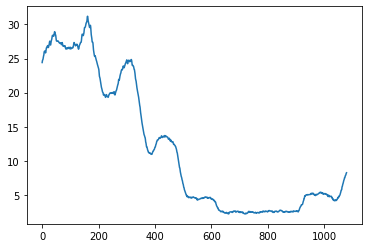

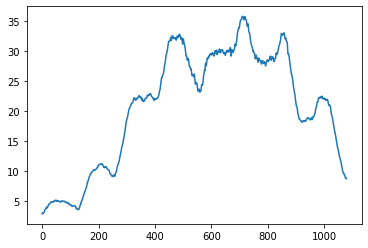

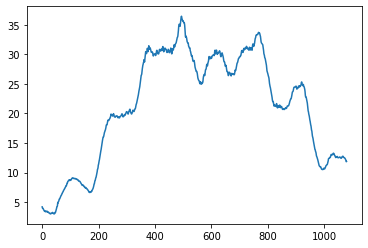

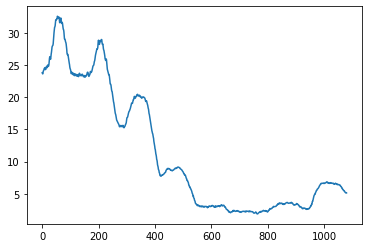

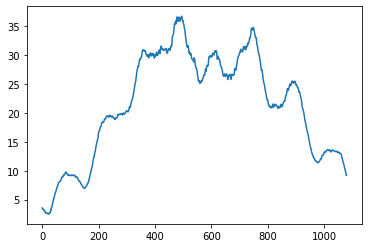

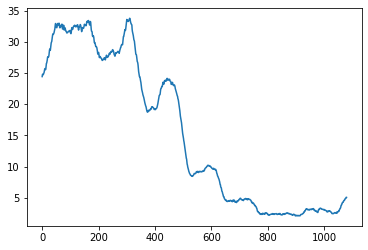

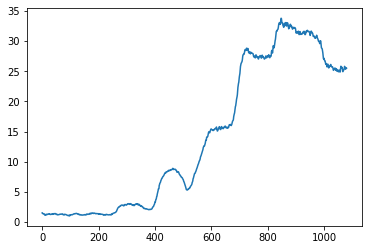

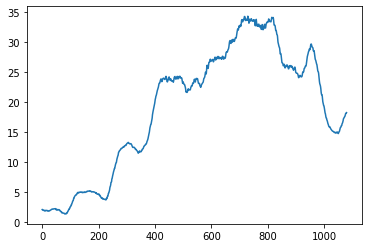

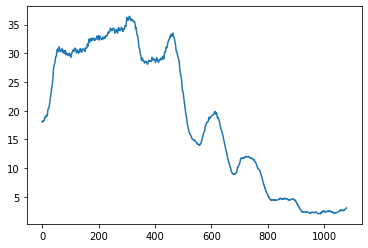

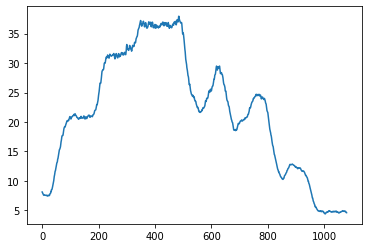

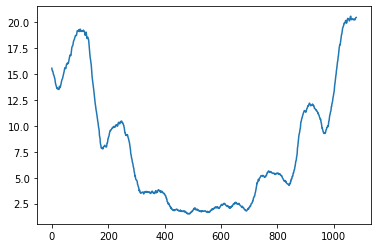

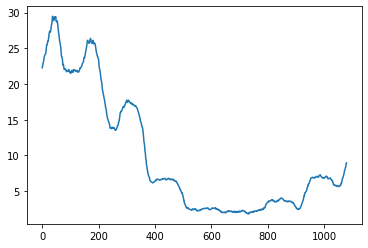

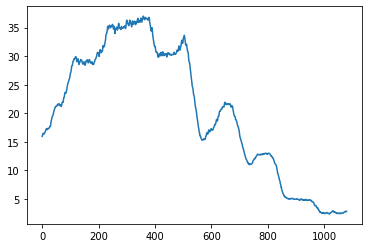

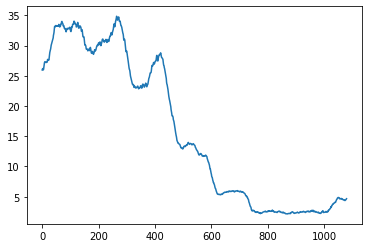

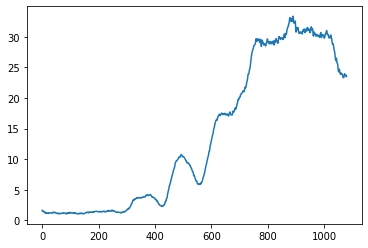

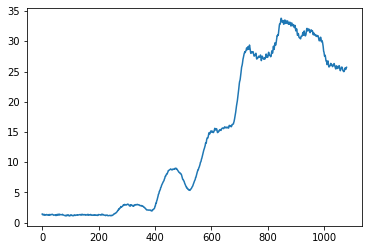

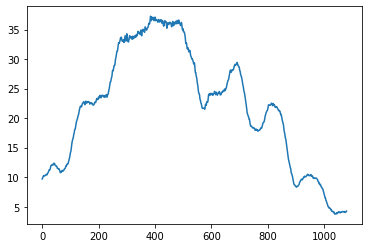

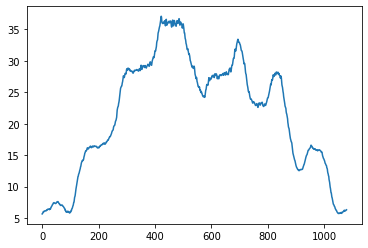

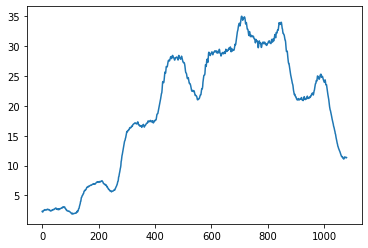

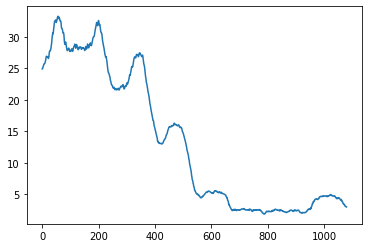

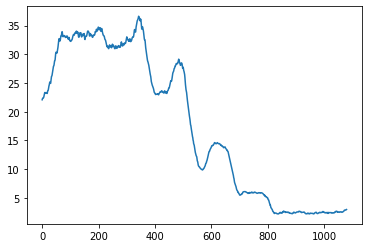

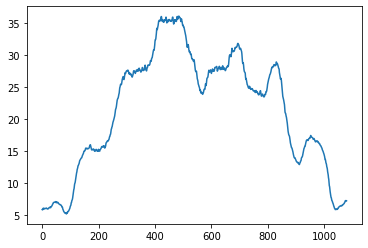

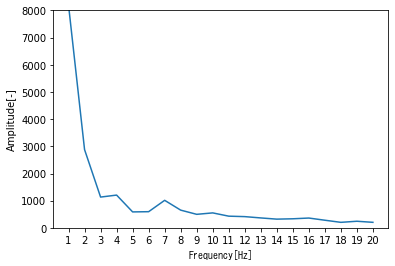

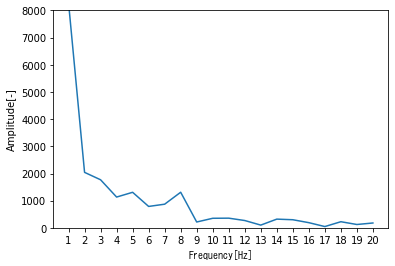

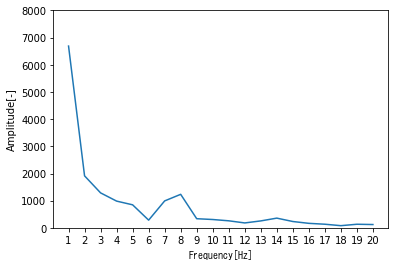

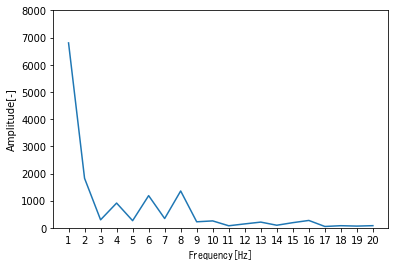

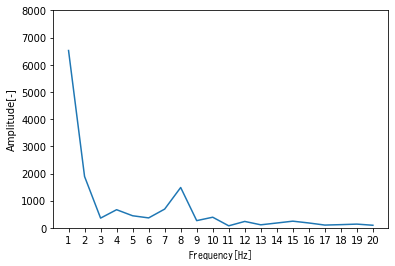

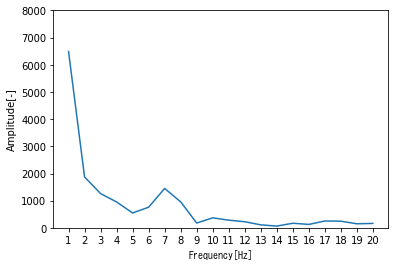

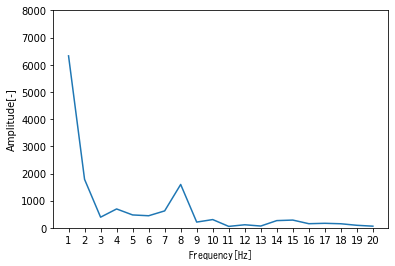

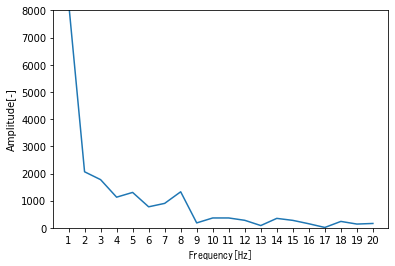

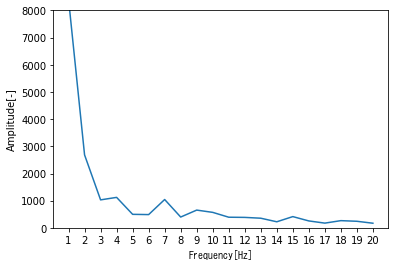

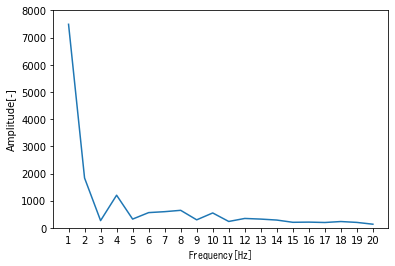

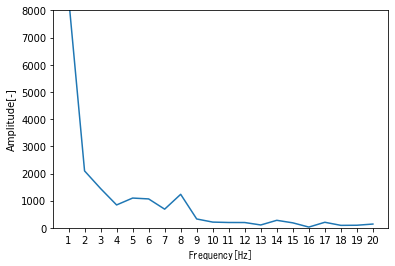

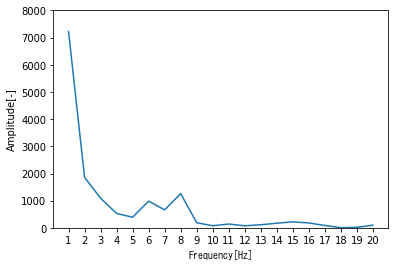

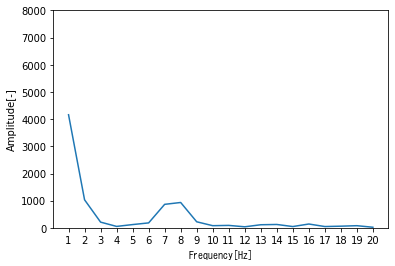

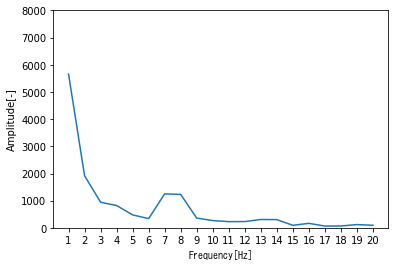

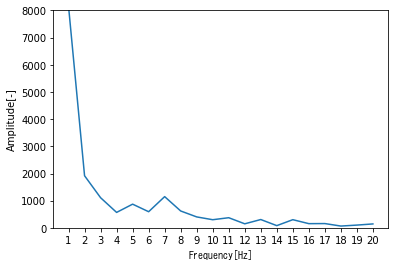

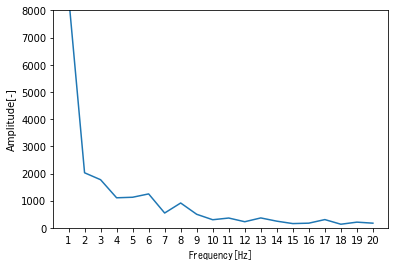

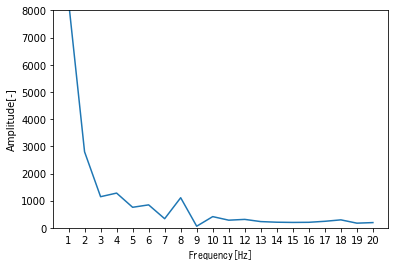

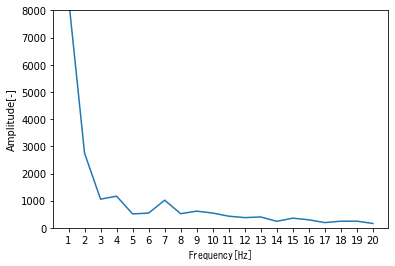

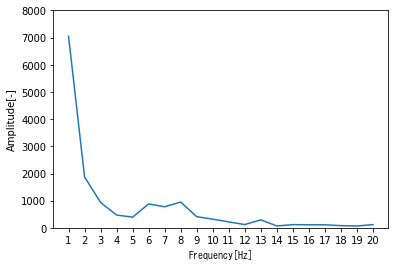

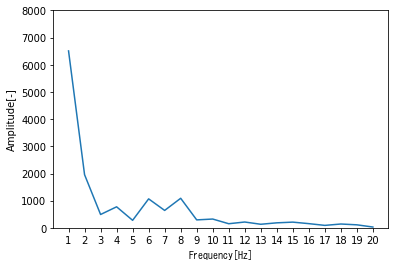

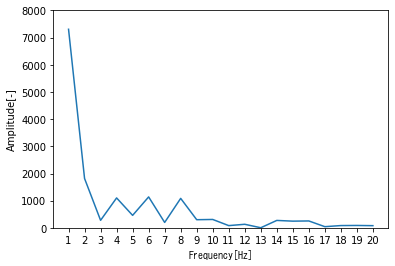

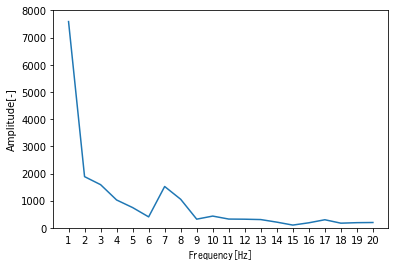

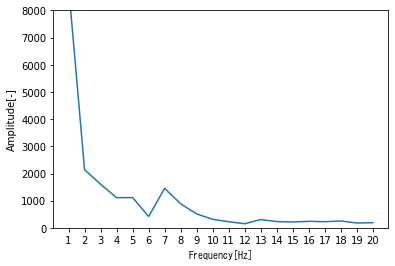

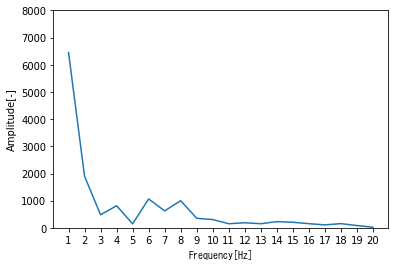

In [12]:
#pathとデータの確認
path = 'C:/Users/Minoru/Desktop/1209_result/98.8Hz-1204.752'
extensions = 'jpg'
target = pathlist.make_pathlist(path,extensions)
# print(target)
data_contents = pathlist.data_contents_smart_picture(target)#スマホ用
# data_contents = pathlist.data_contents_picture(target)#pointgrey用
pathlist.contents_output(data_contents[0],target)
# pathlist.contents_ana_output(data_contents[0],target)#スマホ用
# pathlist.contents_output(data_contents[1])#pointgrey用

#周波数特性の確認
specs_all = fft_func.fft_result(data_contents[0])
# print(specs_all.shape)
# fft_func.fft_output(specs_all,target)#pointgrey用
fft_func.fft_output(specs_all,target)#スマホ用

In [6]:
#データの整形（4LEDの時）
# freq_means4led = data_formatting.format_multi_LED(specs_all,LED_freq_deg)
#データの整形（1LEDの時）
freq_means4led = data_formatting.format_mono_LED(specs_all,3,1,LED_freq_deg)#同じLEDのデータ数,LEDの数

#LEDからのRSSと距離の関係の配列
LED_to_recv_dis = functions.dis_output(LED_T,recv_T)

[[3.91472458 6.23678899 6.15203946]]
(1, 3)


ValueError: x and y must have same first dimension, but have shapes (6,) and (1,)

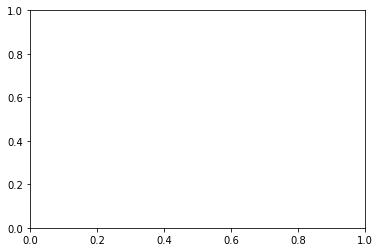

In [9]:
#プロットの出力
# data_formatting.output_RSS_to_pos(LED_to_recv_dis,freq_means4led)

In [8]:
#fitting modelの生成
def theoreticalValue(x,unknown_num1,unknown_num2):
    dis = unknown_num1/(np.exp(np.pi*0.5*unknown_num2*x)+np.exp(-np.pi*0.5*unknown_num2*x))
    return dis

#certain = np.abs(np.sin(LED_freq[i]*np.pi/sampling_freq)/(LED_freq[i]*np.pi/sampling_freq))*((2.24-1.16)**(0.82+5.35))
all_beta = []
for i in range(4):
    beta,pconv = curve_fit(theoreticalValue,LED_to_recv_dis[i],freq_means4led[i])
    beta[1] = np.abs(beta[1])
    all_beta.append(beta)
    # plt.scatter(LED_to_recv_dis[i],freq_means4led[i])
    # q = np.arange(0.2,2.0,0.1)
    # plt.plot(q,theoreticalValue(q, beta[0], beta[1]))
    # plt.grid(linestyle='dotted')
    # # plt.title(f'一つずつ光らせた時のfitting　LED{i+1}',fontname="MS Gothic")
    # plt.title(f'全てのLEDを光らせた時のfitting　LED{i+1}',fontname="MS Gothic")
    # # plt.savefig(f'each_LED{i+1}fitting.png')
    # plt.savefig(f'all_LED{i+1}fitting.png')
    # plt.show()
all_beta=np.array(all_beta)
print(all_beta)

[[9.32901861e+03 5.17643225e-01]
 [6.56506534e+03 5.22134739e-01]
 [1.77304665e+03 4.29452521e-01]
 [1.32787251e+03 4.28801972e-01]]


In [10]:
#解析データの読み込み
#pathとデータの確認
ana_path = 'S:/2021-12-02/1202_xperia_exdata_part2/test_data'
extensions = 'jpg'
ana_target = pathlist.make_pathlist(ana_path,extensions)
# print(ana_target)
# ana_data_contents = pathlist.data_contents_picture(ana_target)#pointgrey用
ana_data_contents = pathlist.data_contents_smart_picture(ana_target)#スマホ用
# pathlist.contents_ana_output(ana_data_contents[0],ana_target)
# pathlist.contents_output(data_contents[1])

#周波数特性の確認
ana_specs_all = fft_func.fft_result(ana_data_contents[0])
print(ana_specs_all.shape)
# fft_func.fft_ana_output(ana_specs_all,ana_target)


imgs_all: (4, 1920, 1080), imgs_each: (4, 1620, 1080)
avg_rows_all: (4, 1080), avg_rows_each: (4, 1080)
(4, 540)


In [11]:
#全てのLEDを光らせた時
ana_freq_means4led = data_formatting.format_multi_LED(ana_specs_all,LED_freq_deg)
#一つのLEDを光らせた時
# ana_freq_means4led = data_formatting.format_mono_LED(ana_specs_all,4,4,LED_freq_deg)#同じLEDのデータ数,LEDの数

#fittingのモデルを用いたLEDと測位点との距離
recv_to_trans = analysis_function.reflect_light_positioning(all_beta,ana_freq_means4led)
trans_to_recv = recv_to_trans.T
# print(trans_to_recv)

(4, 4)
[[4273.4139546  3866.68472152 3697.79752443 3521.71853736]
 [2631.45917286 2351.69231214 3200.10430959 2664.88735606]
 [ 808.08878276  939.99086886  716.7805365   885.23100213]
 [ 588.41324162  504.67247481  553.07072173  654.56350161]]


s:\VLP\analysis_function.py:8: RuntimeWarning: invalid value encountered in arccosh
  dis_rec_to_tra = 2*(np.arccosh(0.5*all_beta[i,0]/np.abs(ana_freq_means[i]))/(np.pi*all_beta[i,1]))#LED1と5つの受信機の位置の関係dk


In [12]:
#結果のポジションの出力
def objectiveFunction(estimate_position):
    error = trans_to_recv[i] - theoreticalValue(estimate_position)
    return error


def theoreticalValue(estimate_position):
    dis_all=[]
    for LED in LED_T:
        dis = np.sqrt((estimate_position[0]-LED[0])**2+(estimate_position[1]-LED[1])**2)
        dis_all.append(dis)
    dis_all=np.array(dis_all)
    return dis_all


initialValue = np.array([0.9, 0.2])
position_all = []
#最小二乗法
for i in range(4):
    position = leastsq(objectiveFunction, initialValue)
    position_all.append(position[0])

position_all = np.array(position_all)
print(position_all)

[[1.35586229 1.47984468]
 [1.01928091 1.80493806]
 [1.76573648 1.19401695]
 [1.46585941 1.86495113]]


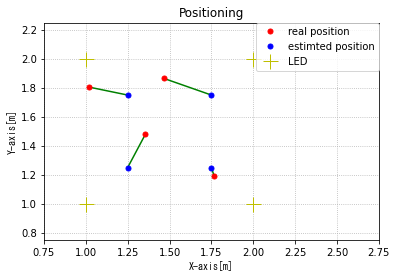

In [13]:
analysis_function.result_output(position_all,recv_ana,LED_T)